# Implementando uma árvore binária

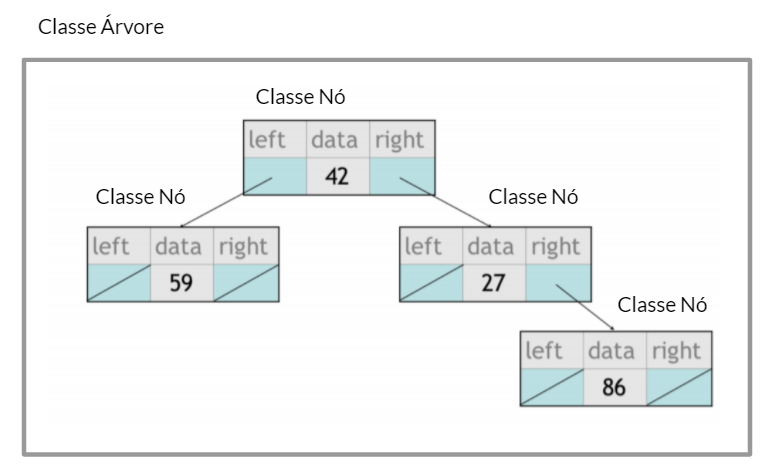

Na imagem acima podemos ver que a ideia é que tenhamos uma classe maior, que será a árvore, que apenas saberá quem é a raiz dela. E, dessa raiz, saiam todas as ramificações (nós) presentes na árvore. Sendo assim, precisamos implementar duas classes:

- Arvore
- No

Um ponto muito importante aqui é ter a consciência de que _left_ e _right_ ou indicam None, para quando não temos filhos, ou apontam para outro objeto do tipo Nó, como veremos abaixo.

In [51]:
class ArvoreBinaria():
    
    def __init__(self, raiz):
        self.raiz = raiz

In [29]:
class No():
    
    def __init__(self, valor, left=None, right=None):
        self.valor = valor
        self.left = left
        self.right = right
    
    ## Magic ou Dunder method
    def __repr__(self):
        return str(self.valor)

Vamos começar criando nossa árvore acima, indo das folhas até a raiz!

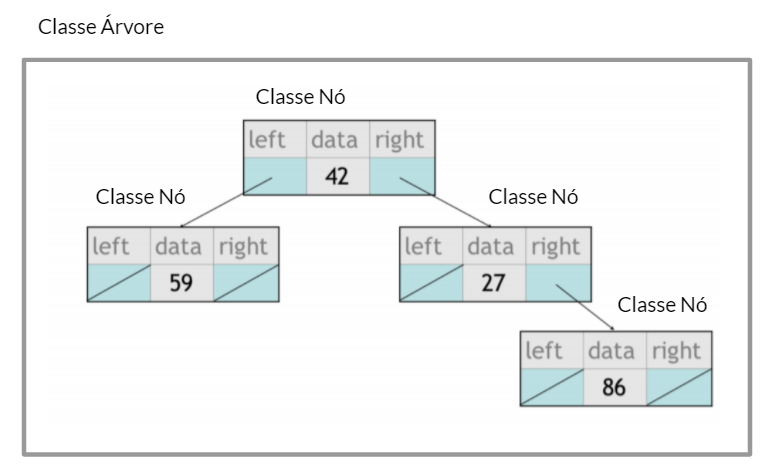

In [30]:
No4 = No(86)
No3 = No(59)
No2 = No(27, right=No4)
No1 = No(42, right=No2, left=No3)

In [31]:
minha_arvore = ArvoreBinaria(No1)

In [32]:
minha_arvore.raiz.right.right

86

## Criando nossa árvore binária de busca

Usando as classes que fizemos, vamos criar a seguinte árvore binaria de busca:

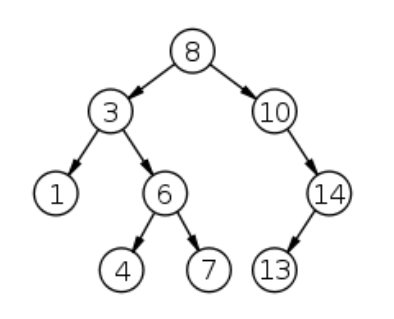

Igual ao outro, vamos começar debaixo para cima!

In [33]:
No13 = No(13)
No7 = No(7)
No4 = No(4)
No1 = No(1)
No14 = No(14, left=No13)
No6 = No(6, left=No4, right=No7)
No3 = No(3, left=No1, right=No6)
No10 = No(10, right=No14)
No8 = No(8, left=No3, right=No10)

In [34]:
minha_arvore = ArvoreBinaria(No8)

In [ ]:
class ArvoreBinaria():
    
    def __init__(self, raiz):
        self.raiz = raiz
    
    def busca_valor(self, valor):
        return self._busca_valor(self.raiz, valor)
    
    def _busca_valor(self, no, valor):
        if no is None:
            return False
        
        if valor == no.valor:
            return True
        else:
            if valor <= no.valor:
                return self._busca_valor(no.left, valor)
            else:
                return self._busca_valor(no.right, valor)

In [ ]:
minha_arvore = ArvoreBinaria(No8)

In [50]:
minha_arvore.busca_valor(100)

False

## Calculando altura

In [77]:
class ArvoreBinaria():
    
    def __init__(self, raiz):
        self.raiz = raiz
    
    def busca_valor(self, valor):
        return self._busca_valor(self.raiz, valor)
    
    def _busca_valor(self, no, valor):
        if no is None:
            return False
        
        if valor == no.valor:
            return True
        else:
            if valor <= no.valor:
                return self._busca_valor(no.left, valor)
            else:
                return self._busca_valor(no.right, valor)
            
    @property
    def altura(self):
        return self._altura(self.raiz)
    
    def _altura(self, no):
        if no == None:
            return 0
        
        altura_esquerda = self._altura(no.left)
        altura_direita = self._altura(no.right)
        return max(altura_esquerda, altura_direita) + 1

In [75]:
minha_arvore = ArvoreBinaria(No8)

In [76]:
## Parece um atributo, mas nao é!!!
minha_arvore.altura

4

## Inserção simples

In [78]:
class ArvoreBinaria():
    
    def __init__(self, raiz=None):
        self.raiz = raiz
    
    def busca_valor(self, valor):
        return self._busca_valor(self.raiz, valor)
    
    def _busca_valor(self, no, valor):
        if no is None:
            return False
        
        if valor == no.valor:
            return True
        else:
            if valor <= no.valor:
                return self._busca_valor(no.left, valor)
            else:
                return self._busca_valor(no.right, valor)
            
    @property
    def altura(self):
        return self._altura(self.raiz)
    
    def _altura(self, no):
        if no == None:
            return 0
        
        altura_esquerda = self._altura(no.left)
        altura_direita = self._altura(no.right)
        return max(altura_esquerda, altura_direita) + 1
    
    def inserir(self, no):
        if self.raiz is None:
            self.raiz = no
        
        else:
            no_antigo = self.raiz
            if no.valor <= self.raiz.valor:
                no_atual = self.raiz.left
            else:
                no_atual = self.raiz.right
                
            while no_atual is not None:
                no_antigo = no_atual
                if no.valor <= no_atual.valor:
                    no_atual = no_atual.left
                else:
                    no_atual = no_atual.right
            
            if no.valor <= no_antigo.valor:
                no_antigo.left = no
            else:
                no_antigo.right = no
        
        return 'Inserido'
        
    def inorder(self, no):
        if no is not None:
            self.inorder(no.left)
            print(no.valor)
            self.inorder(no.right)

In [79]:
ABB = ArvoreBinaria()

In [80]:
ABB.inserir(No(20))

'Inserido'

In [81]:
ABB.inserir(No(12))

'Inserido'

In [82]:
ABB.raiz.left.left

In [83]:
ABB.inserir(No(40))

'Inserido'

In [84]:
ABB.raiz.right

40

## Mas só da para usar árvores se tivermos uma classe?

A resposta é: Não! O importante é entender a estrutura de uma árvore, ou seja, temos um padrão de acesso (para árvore binária, esquerda e direita, ou indice 0 e 1). Poderiamos fazer uma árvore com um dicionário ou uma lista, por exemplo.

In [87]:
arvore_dict = {
    'raiz': {
        'valor': 10,
        'esquerda': {
            'valor': 5,
            'esquerda': None,
            'direita': None
        },
        'direita': {
            'valor': 20,
            'esquerda': None,
            'direita': None
        }
    }
}

In [89]:
arvore_dict['raiz']['direita']

{'valor': 20, 'esquerda': None, 'direita': None}

In [90]:
arvore_lista = [10, [[5, [None, None]], [20, [None, None]]]]

In [94]:
arvore_lista[1][0]

[5, [None, None]]

## Exibição de árvore

In [86]:
class ArvoreBinaria():
    
    def __init__(self, raiz=None):
        self.raiz = raiz
    
    def busca_valor(self, valor):
        return self._busca_valor(self.raiz, valor)
    
    def _busca_valor(self, no, valor):
        if no is None:
            return False
        
        if valor == no.valor:
            return True
        else:
            if valor <= no.valor:
                return self._busca_valor(no.left, valor)
            else:
                return self._busca_valor(no.right, valor)
            
    @property
    def altura(self):
        return self._altura(self.raiz)
    
    def _altura(self, no):
        if no == None:
            return 0
        
        altura_esquerda = self._altura(no.left)
        altura_direita = self._altura(no.right)
        return max(altura_esquerda, altura_direita) + 1
    
    def inserir(self, no):
        if self.raiz is None:
            self.raiz = no
        
        else:
            no_antigo = self.raiz
            if no.valor <= self.raiz.valor:
                no_atual = self.raiz.left
            else:
                no_atual = self.raiz.right
                
            while no_atual is not None:
                no_antigo = no_atual
                if no.valor <= no_atual.valor:
                    no_atual = no_atual.left
                else:
                    no_atual = no_atual.right
            
            if no.valor <= no_antigo.valor:
                no_antigo.left = no
            else:
                no_antigo.right = no
        
        return 'Inserido'
        
    def inorder(self, no):
        if no is not None:
            self.inorder(no.left)
            print(no.valor)
            self.inorder(no.right)

In [85]:
ABB.inorder(ABB.raiz)

12
20
40
